In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [22]:
data = []
with open(r'../Data/original/image sets/train.txt', 'r') as file:
    for line in file:
        line = line.strip()  # Eliminar los espacios en blanco y saltos de línea al inicio y final de la línea
        data.append(line)

ages = []
image_names = []
genders = []
for line in data:
    image_name, gender = line.split()  # Separar el nombre de la imagen y la etiqueta de género
    age = int(image_name[6:8])  # Extraer la parte correspondiente a la edad del nombre de la imagen y convertirla a entero
    ages.append(age)
    image_name, gender = line.split()  # Separar el nombre de la imagen y la etiqueta de género
    image_names.append(image_name)
    genders.append(int(gender))

# Ahora metemos los datos obtenidos en un dataframe de pandas
train_pd = pd.DataFrame()
train_pd['Img_name'] = image_names
train_pd['Age'] = ages
train_pd['Gender'] = genders
# Con este dataframe de pandas generamos un archivo .csv con los datos para utilizarlos posteriormente.
train_pd.to_csv('../Data/processed/train-processed.csv', index=None)
train_pd.head()

,Img_name,Age,Gender
0,00000A02.jpg,2,0
1,00002A02.jpg,2,0
2,00004A02.jpg,2,0
3,00006A02.jpg,2,0
4,00008A02.jpg,2,0


In [23]:
# Repetimos el proceso para los datos de validación.

data = []
with open(r'../Data/original/image sets/val.txt', 'r') as file:
    for line in file:
        line = line.strip()  # Eliminar los espacios en blanco y saltos de línea al inicio y final de la línea
        data.append(line)

ages = []
image_names = []
genders = []
for line in data:
    image_name, gender = line.split()  # Separar el nombre de la imagen y la etiqueta de género
    age = int(image_name[6:8])  # Extraer la parte correspondiente a la edad del nombre de la imagen y convertirla a entero
    ages.append(age)
    image_name, gender = line.split()  # Separar el nombre de la imagen y la etiqueta de género
    image_names.append(image_name)
    genders.append(int(gender))


val_pd = pd.DataFrame()
val_pd['Img_name'] = image_names
val_pd['Age'] = ages
val_pd['Gender'] = genders

val_pd.to_csv('../Data/processed/val-processed.csv', index=None)
val_pd.head()

,Img_name,Age,Gender
0,00001A02.jpg,2,0
1,00003A02.jpg,2,0
2,00005A02.jpg,2,0
3,00007A02.jpg,2,0
4,00009A02.jpg,2,0


In [52]:
image_vectors = []


# Iterar sobre cada fila del DataFrame
for index, row in train_pd.iterrows():
    image_name = row['Img_name']
    image_path = '../Data/original/original images/' + image_name

    # Cargar la imagen y redimensionarla al tamaño deseado
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (300, 340))  # Redimensionar la imagen todas al mismo tamaño
    image_tensor = np.expand_dims(image, axis=0)

    # Agregar el tensor de imagen a la lista
    image_vectors.append(image_tensor)

# Concatenar los tensores de imagen en un solo array de numpy
image_array = np.concatenate(image_vectors, axis=0)

# Guardar el array de imágenes correctamente
np.save('../Data/processed/image_array_train.npy', image_array)

In [54]:
image_vectors = []


# Iterar sobre cada fila del DataFrame
for index, row in val_pd.iterrows():
    image_name = row['Img_name']
    image_path = '../Data/original/original images/' + image_name

    # Cargar la imagen y redimensionarla al tamaño deseado
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (300, 340))  # Redimensionar la imagen todas al mismo tamaño
    image_tensor = np.expand_dims(image, axis=0)

    # Agregar el tensor de imagen a la lista
    image_vectors.append(image_tensor)

# Concatenar los tensores de imagen en un solo array de numpy
image_array = np.concatenate(image_vectors, axis=0)

# Guardar el array de imágenes correctamente
np.save('../Data/processed/image_array_val.npy', image_array)

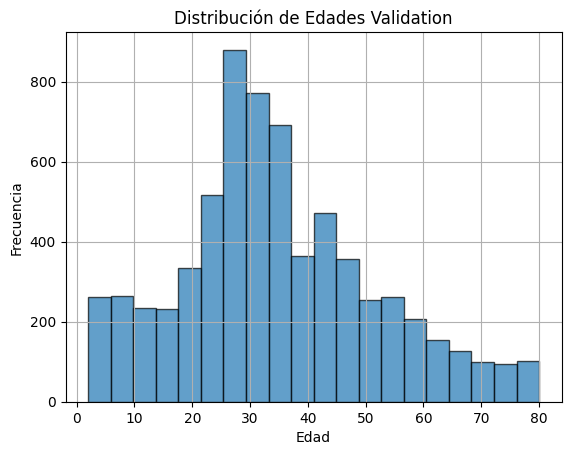

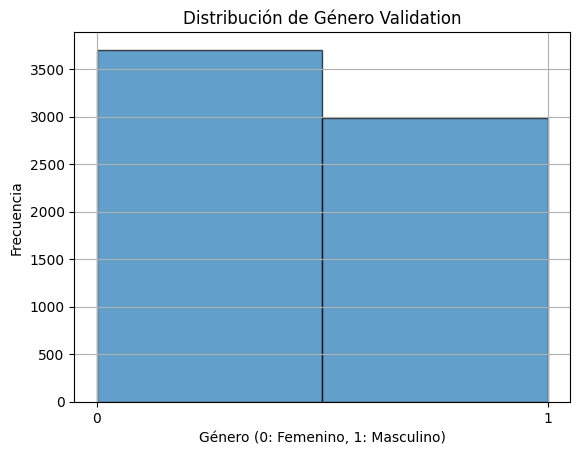

In [25]:
# Histograma de Edades
plt.hist(val_pd['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades Validation')
plt.grid(True)
plt.show()

# Histograma de Género
plt.hist(val_pd['Gender'], bins=2, edgecolor='black', alpha=0.7)
plt.xlabel('Género (0: Femenino, 1: Masculino)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Género Validation')
plt.xticks([0, 1])
plt.grid(True)
plt.show()